# Twitter Tweet Sentiment Analysis 
##### Udacity Machine Learning Engineer Nanodegree Capstone project

##### Sujay Bhowmick
10th August 2018

### Project Goal

In NLP sentiment analysis is the most common problems through which we try to infer the sentiment of sentence or a paragraph. 

The goal of this Machine Learning Nanodegree Capstone project is to analyse the sentiment of various twitter tweets which is publicly available.

The tweets are related to financial news which have been labelled by a human for training and testing purpose of the Machine Learning model. There are approximately 8000 tweets which have been labelled with labels **Positive** and **Negative** for tweets indicating a **Positive** sentiment and **Negative** sentiment respectively.

Further some preprocessing is performed on the raw tweets to remove certain punctuations, links, tweet handles and certain special characters.

### Data
Let's take a look at data. The labels are encoded in the dataset: **0** is for **Negative** and **1** for a **Positive** sentiment

In [2]:
# Loading the preprocessed csv file into pandas and dropping the msg_id column

import pandas as pd
base_dir = "data"

def load_data():
    # Read the twitter data file csv
    df = pd.read_csv(base_dir + "/preprocessed_tweets2.csv", encoding='latin-1')
    df = df.drop(columns=['msg_id'])
    return df

In [3]:
# Display the labeled data
df = load_data()
df

,content,label
0,omg its already 7:30 :O,1
1,Juuuuuuuuuuuuuuuuussssst Chillin!!,1
2,handed in my uniform today . i miss you already,1
3,hmmmm.... i wonder how she my number <NAME/>,1
4,thanks to all the haters up in my face all day...,1
5,Feeling strangely fine. Now I'm gonna go liste...,1
6,You're the only one who can see this cause no ...,1
7,"goodbye exams, HELLO ALCOHOL TONIGHT",1
8,uploading pictures on friendster,1
9,(: !!!!!! - so i wrote something last week. an...,1


In [4]:
positive_count = len(df[df['label'] == 1])
negative_count = len(df[df['label'] == 0])
print("Positive:", positive_count)
print("Negative:", negative_count)
print("Total:", positive_count + negative_count)

Positive: 776000
Negative: 777000
Total: 1553000


In [5]:
from sklearn.model_selection import train_test_split
X, y = train_test_split(df, test_size=0.2, shuffle=True)
print(X.shape)
print(y.shape)

(1242400, 2)
(310600, 2)


Use a custom tokenizer to understand the distribution of words in the tweets dataset. We see that the maximum number of token in the training dataset is around 20. This provides us a good input feature of the tweet content which can be used for building the classifier

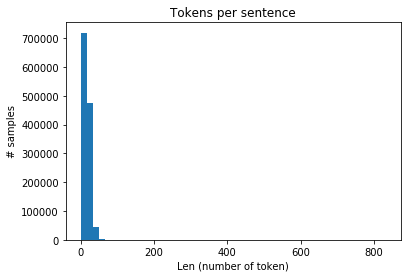

In [11]:
import re
import string
import os
import matplotlib
import matplotlib.pyplot as plot
from keras.preprocessing.text import Tokenizer

# Tokenize
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()
# Plot 
plot.hist([len(tokenize(s)) for s in X['content'].values], bins=50)
plot.title('Tokens per sentence')
plot.xlabel('Len (number of token)')
plot.ylabel('# samples')
plot.show()

### Training Parameters (Hyper Parameters)
We'll set the following hyperparameters for training our model.
The above token per word plot, is used to determine the MAX_LEN which is according to plot is 20

In [13]:
# Number of examples used in each iteration
BATCH_SIZE = 32 
# Size of vocabulary dictionary
VOCAB_SIZE = 30000
# Max length of tweet as per the plot above
MAX_LEN = 22
# Dimension of word embedding vector
EMBEDDING_DIM = 40

### Preprocessing

Before using the data for the model, we need to preprocess the tweet content. For this purpose we will use Keras Tokenizer to convert each word into a corresponding integer identifier. In order for us to use the content in the Model we must ensure the length of the content is same. We can do this by using the Keras **sequence.pad_sequences** function. All content greater than MAX_LEN will be truncated and text which are less than MAX_LEN will be padded to get the same length

In [14]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
import numpy as np
from keras.utils.vis_utils import plot_model
from tensorflow import set_random_seed
from numpy.random import seed
seed(1)
set_random_seed(2)

tweet_tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tweet_tokenizer.fit_on_texts(X['content'].values)

X_train_seq = tweet_tokenizer.texts_to_sequences(X['content'].values)
X_test_seq = tweet_tokenizer.texts_to_sequences(y['content'].values)

X_train = sequence.pad_sequences(X_train_seq, maxlen=MAX_LEN, padding="post", value=0)
X_test = sequence.pad_sequences(X_test_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_test = X['label'].values, y['label'].values

In [15]:
def print_sample_before_after_tokenizing():
    print('First sample before preprocessing: \n', X['content'].values[0], '\n')
    print('First sample after preprocessing: \n', X_train[0])
    
print_sample_before_after_tokenizing()

First sample before preprocessing: 
 <NAME/> actually if I were closer I'd stop by for some of your gluten free pancakes! (with chocolate ice cream of course) 

First sample after preprocessing: 
 [    1   292    78     2   171  1893   401   339   121    12    66    13
    48 10960   375  2111    22   727   588   666    13   544]


### Model Architecture
I have used a model based on Kim Yoon’s [Convolutional Neural Networks for Sentence Classification.](https://arxiv.org/abs/1408.5882)

![title](docs/img/CNN_Architecture.png)

In [16]:
def get_model():

    # CNN Model

    NUM_FILTERS = 250
    KERNEL_SIZE = 3
    HIDDEN_DIMS = 250

    model = Sequential()

    # We use embedding layer which maps our vocabulary indices into EMBEDDING_DIM dimensions
    model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
    model.add(Dropout(0.2))

    # Adding Convolution1D
    model.add(Conv1D(NUM_FILTERS,
                     KERNEL_SIZE,
                     padding='valid',
                     activation='relu',
                     strides=1))

    # Add a max pooling:
    model.add(GlobalMaxPooling1D())

    # Add a simple hidden layer:
    model.add(Dense(HIDDEN_DIMS))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))

    # We project onto a single unit output layer, and use sigmoid function
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# Show model summary
model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 22, 40)            1200000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 40)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 250)           30250     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_3 (Activation)    (None, 250)               0         
__________

In [31]:
from keras.utils.vis_utils import plot_model
plot_model(get_model(), to_file='docs/img/model_plot.png', show_shapes=True, show_layer_names=True)

### Train and Evaluate

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import ModelCheckpoint

def plot_confusion_matrix(y_test, pred):
    cm = confusion_matrix(y_test, pred)
    fig = plot.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plot.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + SENTIMENT_LABELS)
    ax.set_yticklabels([''] + SENTIMENT_LABELS)
    plot.xlabel('Predicted')
    plot.ylabel('True')
    plot.show()

    # Precision,Recall, F1-Score Report
    report = classification_report(pred, y_test, target_names=SENTIMENT_LABELS)
    print(report)


Epoch 00001: val_acc improved from -inf to 0.80551, saving model to models/weights-improvement-01-0.81.hdf5

Epoch 00002: val_acc improved from 0.80551 to 0.81091, saving model to models/weights-improvement-02-0.81.hdf5
310600/310600 [==============================] - 11s 34us/step

Accuracy:  81.0592401802962


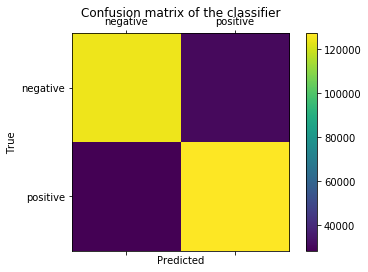

             precision    recall  f1-score   support

   negative       0.80      0.82      0.81    152784
   positive       0.82      0.81      0.81    157816

avg / total       0.81      0.81      0.81    310600



In [23]:
SENTIMENT_LABELS = ['negative', 'positive']

filepath="models/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callback_list = [checkpoint]

    
EPOCHS = 2 # Number of passes through entire dataset
history = model.fit(X_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              validation_split=0.1, callbacks=callback_list, verbose=0)

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred_classes = model.predict_classes(X_test)

plot_confusion_matrix(y_test, pred_classes)


### Test the Model we just trained

In [27]:
SENTIMENT_LABELS = ['negative', 'positive']
def get_prediction(tweet):
    # Preprocessing step
    tweet_words_array = tweet_tokenizer.texts_to_sequences([tweet])
    tweet_words_array = sequence.pad_sequences(tweet_words_array, maxlen=MAX_LEN, padding="post", value=0)
    
    #Predict the sentiment label and score
    score = model.predict(tweet_words_array)[0][0]
    prediction = SENTIMENT_LABELS[model.predict_classes(tweet_words_array)[0][0]]
    print('Tweet:', tweet, '\nPrediction:', prediction, '\nScore: ', score)
    print('\n')
    return prediction, score

# Test Prediction
prediction = get_prediction(". RT @SpryGuy: The CEO of Papa John's stiffs and cheats his own employees so he can live in this castle with a moat. NEVER buy Papa John's pi…")
assert prediction[0] == "negative"
prediction = get_prediction(". GVC Holdings consummated the acquisition of Ladbrokes Coral https://t.co/xaN4ACA0h6 https://t.co/ZNm0gmXLK7")
assert prediction[0] == "positive"
prediction = get_prediction(". #AtlasMara holding is a real ingenious feat in The financial fraternity..am amazed at the forge ahead they posses.. #mindblown")
assert prediction[0] == "positive"
prediction = get_prediction(". Boeing hit hard by tariff and trade war headlines today, down -3.5%. Also note the very ugly price/momentum diverge https://t.co/h9bfT95yWZ")
assert prediction[0] == "negative"
prediction = get_prediction("Didn't see this one coming but makes so much sense... Amazon to Buy Whole Foods in $13.4 Billion Deal https://t.co/tKcF9dUwct")
assert prediction[0] == "positive"
prediction = get_prediction("Starbucks Corporation (SBUX) Stock Isn't as Bad as it Looks. Starbucks Corporation (Nasdaq: SBUX) is making aggressive changes to get its stock back on track. The latest change the company announced this week is the departure of CFO Scott Maw, and analysts say")
assert prediction[0] == "positive"

Tweet: . RT @SpryGuy: The CEO of Papa John's stiffs and cheats his own employees so he can live in this castle with a moat. NEVER buy Papa John's pi… 
Prediction: negative 
Score:  0.30618456


Tweet: . GVC Holdings consummated the acquisition of Ladbrokes Coral https://t.co/xaN4ACA0h6 https://t.co/ZNm0gmXLK7 
Prediction: positive 
Score:  0.6592547


Tweet: . #AtlasMara holding is a real ingenious feat in The financial fraternity..am amazed at the forge ahead they posses.. #mindblown 
Prediction: positive 
Score:  0.9901579


Tweet: . Boeing hit hard by tariff and trade war headlines today, down -3.5%. Also note the very ugly price/momentum diverge https://t.co/h9bfT95yWZ 
Prediction: negative 
Score:  0.17169975


Tweet: Didn't see this one coming but makes so much sense... Amazon to Buy Whole Foods in $13.4 Billion Deal https://t.co/tKcF9dUwct 
Prediction: positive 
Score:  0.56883657


Tweet: Starbucks Corporation (SBUX) Stock Isn't as Bad as it Looks. Starbucks Corporation (Nasdaq

In [30]:
import pickle
# Save the model

model = get_model()
model_json = model.to_json()
with open('models/model.json', 'w') as model_file:
    model_file.write(model_json)
    
# Save the tokenizer
with open('models/tokenizer.pickle', 'wb') as handle:
     pickle.dump(tweet_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)